In [11]:
# ------------------Census texts------------------#

text = {
    "LOADING": "Loading...",
    "IND_CITY_TITLE": 'Industries and Sectors of Charlottesville Residents (% of Total Employed Age 16+ Civilians)',
    "IND_CITY_LEGEND_TITLE": 'Sector',
    "IND_X_TITLE": 'Employed Population (%)',
    "IND_Y_TITLE": 'Industries',
    "IND_CITY_HOVER": '<i>Sector</i>: %{data.name}' + \
                 '<br>%{value:.2f}% of Total Employed<br>' + \
                 'Industries: <b>%{customdata}</b>' + \
                 '<extra></extra>',
    "IND_NEIGHBORHOOD_TITLE": 'Industries of {hood} Residents (% of Total Employed Age 16+ Civilians)',
    "IND_NEIGHBORHOOD_LEGEND_TITLE": "Neighborhood",
    "IND_NEIGHBORHOOD_HOVER": '%{value:.2f}% of Total Employed<br>' + \
                 'Industries: <b>%{customdata}</b>' + \
                 '<extra></extra>',
    "AGE_CITY_TITLE": 'Population Chart for Charlottesville, VA',
    "AGE_LEGEND_TITLE": 'Sex',
    "AGE_X_TITLE": 'Population (%)',
    "AGE_Y_TITLE": 'Age Group',
    "AGE_NEIGHBORHOOD_TITLE": 'Population Chart for {hood} (% of Total)',
    "RACE_CITY_TITLE": 'Population by Race and Ethnicity for Charlottesville, VA (% of Total)',
    "RACE_X_TITLE": 'Population (%)',
    "RACE_Y_TITLE": 'Race and Ethnicity',
    "RACE_NEIGHBORHOOD_TITLE": 'Population by Race and Ethnicity for {hood} (% of Total)',
    "INCOME_CITY_TITLE": 'Population by Household Income for Charlottesville, VA (% of Total)',
    "INCOME_X_TITLE": 'Population (%)',
    "INCOME_Y_TITLE": 'Income Bracket',
    "INCOME_NEIGHBORHOOD_TITLE": 'Population by Household Income for {hood} (% of Total)',
}

In [23]:
# ------------------Census functions------------------#

# modules to import
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# CHANGE THIS LINE TO RELECT PROJECT PATH
project_path = "/project/sdscap-kropko/sdscap-kropko-cvhous/src/starrHill/"

# Neighborhood industry data
industryNeighborhood = pd.read_csv(project_path + 'data/industryNeighborhood.csv')
# Neighborhood age data
ageNeighborhood = pd.read_csv(project_path + "data/ageNeighborhood.csv")
# Neighborhood race data
raceNeighborhood = pd.read_csv(project_path + 'data/raceEthnicityNeighborhood.csv')
# Neighborhood income data
incomeNeighborhood = pd.read_csv(project_path + 'data/incomeNeighborhood.csv')

## Adds ticker annotations to figures
## in: figure, dataset, list of indices, column
## out: figure with annotations added
def addFigAnnotations(fig, data, num, column):
    
    for idx in num:
        fig.add_annotation(dict(font=dict(color = "rgb(7,13,30)", size = 11),
                               x = 1.004,
                               y = data[column][idx],
                               showarrow=False,
                               text=data['ag'][idx],
                               textangle=0,
                               xanchor='right',
                               xref='paper',
                               yref='y'))
    return fig

## Adds ticker annotations to figure frames
## in: frame, dataset, list of indices, index of frame in frame list, column
## out: frame with annotations added to layout
def addFrameAnnotations(frame, data, num, frameIndex, column):
    ## build list of annotations
    annotations = [
        go.layout.Annotation(
            dict(font=dict(color = "rgb(7,13,30)", size = 11), 
                 x = 1.004, 
                 y = data[column][idx + frameIndex * len(num)], 
                 showarrow=False, 
                 text=data['ag'][idx + frameIndex * len(num)], 
                 textangle=0, 
                 xanchor='right',
                 xref='paper',
                 yref='y')
        ) for idx in num]
    ## Add annotations list to frame layout
    frame.layout = go.Layout(annotations = annotations)
    return frame


## Function for creating plot of industry employment populations by neighborhood
## out: figure
def plotIndustryByNeighborhood(n, compare = False):
    fig = px.bar(industryNeighborhood, 
                 x=n,
                 y='Industry', 
                 labels={'value':text['IND_X_TITLE'],
                         'Industry':text['IND_Y_TITLE']}, 
                 animation_frame = "Year",
                 orientation="h", custom_data = ["Desc"], 
                 title = text['IND_NEIGHBORHOOD_TITLE'].format(hood=n))
    ## Fix bar order
    fig.update_yaxes(categoryorder="total ascending")
    ## Change text displayed when mouse hovering over bar
    fig.update_traces(hovertemplate = text['IND_NEIGHBORHOOD_HOVER'])
    fig.update_layout(margin=go.layout.Margin(l=200, r=10, b=0, t=30, pad=15), 
                      plot_bgcolor="rgba(0,0,0,0)", 
                      paper_bgcolor="rgba(0,0,0,0)", 
                      autosize=True, 
                      font=dict(size=13, color="rgb(7,13,30)"),
                      legend=dict(yanchor="bottom", 
                                  x=0.85, 
                                  y=0, 
                                  xanchor="right", 
                                  bgcolor="DimGray"), 
                      hoverlabel_align = 'left', 
                      titlefont={'size': 14}, 
                      title_x = 0.55)
    ## get index of neighborhood selection
    hood_index = industryNeighborhood.columns.get_loc(n)
    ## update dataset with correct ticker for neighborhood selection
    industryNeighborhood['ag'] = [f'({industryNeighborhood.iloc[i, hood_index+19]:,} : {industryNeighborhood.iloc[i, hood_index]:.2f}%)' 
                               for i in range(industryNeighborhood.shape[0])]
    ## Adds (count : pct) ticker at far right of chart
    fig = addFigAnnotations(fig, industryNeighborhood, [i for i in range(13)], 'Industry')
    if compare:
        ## Fixed x axis size for each frame
        fig.update_xaxes(ticktext = ["0", "5", "10", "15", "20", 
                                    "25", "30", "35", "40", "45", 
                                    "50", "55", "60"], 
                        tickvals = [i*5 for i in range(13)], 
                        range = [0, 76],
                        gridcolor='Black')
    else:
        ## Fixed x axis size for each frame
        fig.update_xaxes(ticktext = ["0", "5", "10", "15", "20", 
                                    "25", "30", "35", "40", "45", 
                                    "50", "55", "60"], 
                        tickvals = [i*5 for i in range(13)], 
                        range = [0, 65],
                        gridcolor='Black')
    ## move slider's and buttons' positions slightly left
    fig['layout']['updatemenus'][0]['x']=-0.04
    fig['layout']['sliders'][0]['x']=-0.04
    ## Loop through frames to edit hover and by-frame ticker annotations
    for idx, f in enumerate(fig.frames):
        for dat in f.data:
            dat.hovertemplate = text['IND_NEIGHBORHOOD_HOVER']
        f = addFrameAnnotations(f, industryNeighborhood, 
                                [i for i in range(13)], 
                                idx, 'Industry')

    return fig


## Function for creating plot of age by sex by neighborhood
## out: figure
def plotAgeNeighborhood(n):
    # begin building figure
    fig = px.bar(ageNeighborhood, 
                 y="Age", 
                 x=[n + "_M", n + "_F"],
                 animation_frame='Year', 
                 barmode='group',
                 orientation="h",
                 height = 600,
                 title=text['AGE_NEIGHBORHOOD_TITLE'].format(hood=n), 
                 labels={'variable':text['AGE_LEGEND_TITLE'], 
                         'value':text['AGE_X_TITLE'],
                         'Age':text['AGE_Y_TITLE']}, 
                 color_discrete_map={'Male': '#5886a5','Female': '#58a577'})
    # update layout
    fig.update_layout(margin=go.layout.Margin(l=200, r=10, b=0, t=30, pad=15),
                      plot_bgcolor="rgba(0,0,0,0)",
                      paper_bgcolor="rgba(0,0,0,0)",
                      font=dict(size=13, color="rgb(7,13,30)"),
                      legend=dict(yanchor="bottom", 
                                  x=0.90, 
                                  y=0.85, 
                                  xanchor="right",
                                  bgcolor="DimGray"),
                      titlefont={'size': 14},
                      title_x = 0.56)
    ## Fixed x axis size for each frame
    fig.update_xaxes(tickvals = [i*5 for i in range(8)], 
                     range = [0, 40],
                     gridcolor='Black')
    # update legend and hovers
    newnames = {n + "_M":'Male', n + "_F":'Female'}
    fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                          legendgroup = newnames[t.name],
                                          hovertemplate = t.hovertemplate.replace(t.name, newnames[t.name])))
    # update legend and hovers for animated frames
    for idx, f in enumerate(fig.frames):
        for dat in f.data:
            dat.update(name = newnames[dat.name], 
                       legendgroup = newnames[dat.name], 
                       hovertemplate = dat.hovertemplate.replace(dat.name, newnames[dat.name]))
    fig['layout']['updatemenus'][0]['x']=-0.04
    fig['layout']['sliders'][0]['x']=-0.04

    return fig

## Function for creating race plot for the individual neighborhoods
## in: neighborhood, t/f whether the plot is for the comparison page
## out: figure
def plotRaceNeighborhood(n, compare = False):
    # begin building figure
    fig = px.bar(raceNeighborhood, 
                 y="Race and Ethnicity", 
                 x=n,
                 animation_frame='Year',
                 orientation="h",
                 title=text['RACE_NEIGHBORHOOD_TITLE'].format(hood=n), 
                 labels={n:text['RACE_X_TITLE'],
                         'Race and Ethnicity':text['RACE_Y_TITLE']})
    ## Fix bar order
    fig.update_yaxes(categoryorder="total ascending")
    # update layout
    fig.update_layout(margin=go.layout.Margin(l=200, r=10, b=0, t=30, pad=15),
                      plot_bgcolor="rgba(0,0,0,0)",
                      paper_bgcolor="rgba(0,0,0,0)",
                      autosize=True,
                      font=dict(size=13, color="rgb(7,13,30)"),
                      legend=dict(yanchor="bottom", 
                                  x=0.90, 
                                  y=0.85, 
                                  xanchor="right",
                                  bgcolor="DimGray"),
                      titlefont={'size': 14},
                      title_x = 0.59)
    ## get index of neighborhood selection
    hood_index = raceNeighborhood.columns.get_loc(n)
    ## update dataset with correct ticker for neighborhood selection
    raceNeighborhood['ag'] = [f'({raceNeighborhood.iloc[i, hood_index+19]:,} : {raceNeighborhood.iloc[i, hood_index]:.2f}%)' 
                               for i in range(raceNeighborhood.shape[0])]
    ## Adds (count : pct) ticker at far right of chart
    fig = addFigAnnotations(fig, raceNeighborhood, [i for i in range(8)], 'Race and Ethnicity')
    if compare:
        ## Fixed x axis size for each frame
        fig.update_xaxes(tickvals = [i*10 for i in range(10)], 
                        range = [0, 122],
                        gridcolor='Black')
    else:
        ## Fixed x axis size for each frame
        fig.update_xaxes(tickvals = [i*10 for i in range(11)], 
                        range = [0, 109],
                        gridcolor='Black')
    fig['layout']['updatemenus'][0]['x']=-0.04
    fig['layout']['sliders'][0]['x']=-0.04
    ## Loop through frames to edit hover and by-frame ticker annotations
    for idx, f in enumerate(fig.frames):
        f = addFrameAnnotations(f, raceNeighborhood, 
                                [i for i in range(8)], 
                                idx, 'Race and Ethnicity')

    return fig

## Function for creating income plot for the individual neighborhoods
## in: neighborhood, t/f whether the plot is for the comparison page
## out: figure
def plotIncomeNeighborhood(n, compare = False):
    # begin building figure
    fig = px.bar(incomeNeighborhood, 
                 y="Bracket", 
                 x=n,
                 animation_frame='Year',
                 orientation="h",
                 title=text['INCOME_NEIGHBORHOOD_TITLE'].format(hood=n), 
                 height=600,
                 labels={n:text['INCOME_X_TITLE'],
                         'Race':text['INCOME_Y_TITLE']})
    # update layout
    fig.update_layout(margin=go.layout.Margin(l=200, r=10, b=0, t=30, pad=15),
                      plot_bgcolor="rgba(0,0,0,0)",
                      paper_bgcolor="rgba(0,0,0,0)",
                      font=dict(size=13, color="rgb(7,13,30)"),
                      legend=dict(yanchor="bottom", 
                                  x=0.90, 
                                  y=0.85, 
                                  xanchor="right",
                                  bgcolor="DimGray"),
                      titlefont={'size': 14},
                      title_x = 0.555)
    ## get index of neighborhood selection
    hood_index = incomeNeighborhood.columns.get_loc(n)
    ## update dataset with correct ticker for neighborhood selection
    incomeNeighborhood['ag'] = [f'({incomeNeighborhood.iloc[i, hood_index+19]:,} : {incomeNeighborhood.iloc[i, hood_index]:.2f}%)' 
                               for i in range(incomeNeighborhood.shape[0])]
    ## Adds (count : pct) ticker at far right of chart
    fig = addFigAnnotations(fig, incomeNeighborhood, [i for i in range(16)], 'Bracket')
    if compare:
        ## Fixed x axis size for each frame
        fig.update_xaxes(tickvals = [i*5 for i in range(8)], 
                        range = [0, 43],
                        gridcolor='Black')
    else:
        ## Fixed x axis size for each frame
        fig.update_xaxes(tickvals = [i*5 for i in range(8)], 
                        range = [0, 40],
                        gridcolor='Black')
    fig['layout']['updatemenus'][0]['x']=-0.04
    fig['layout']['sliders'][0]['x']=-0.04
    ## Loop through frames to edit hover and by-frame ticker annotations
    for idx, f in enumerate(fig.frames):
        f = addFrameAnnotations(f, incomeNeighborhood, 
                                [i for i in range(16)], 
                                idx, 'Bracket')
    
    return fig

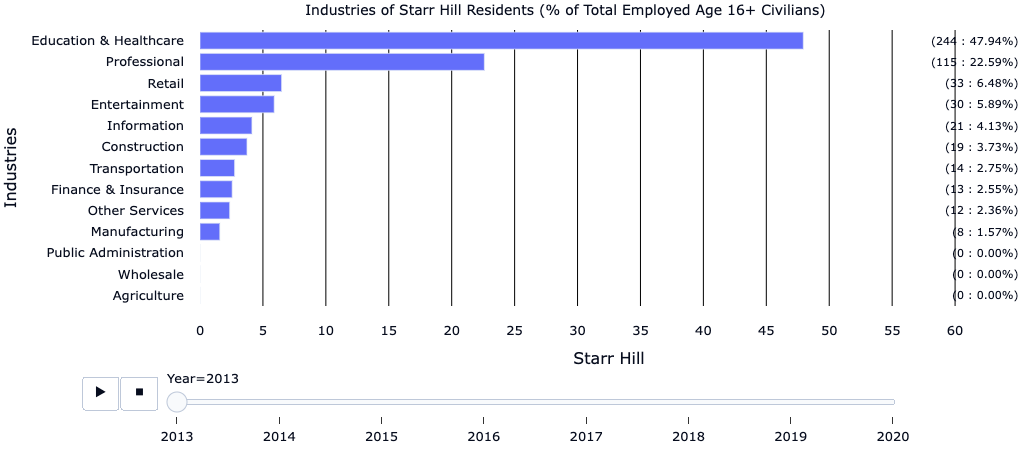

In [24]:
plotIndustryByNeighborhood('Starr Hill')

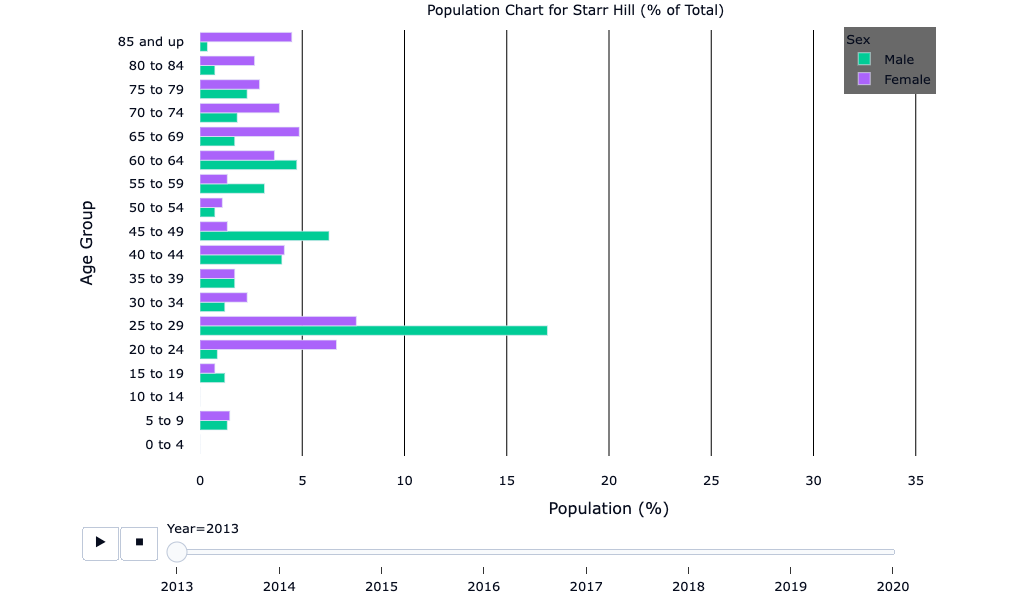

In [25]:
plotAgeNeighborhood('Starr Hill')

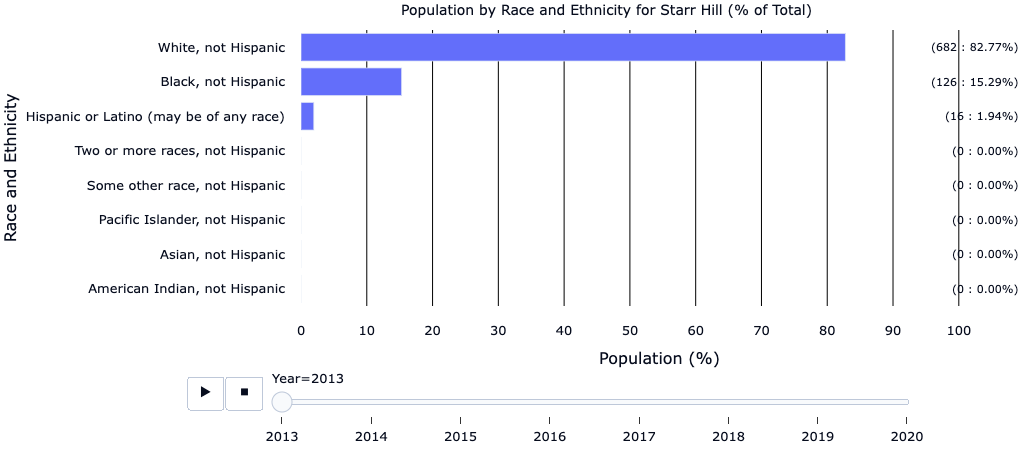

In [26]:
plotRaceNeighborhood('Starr Hill')

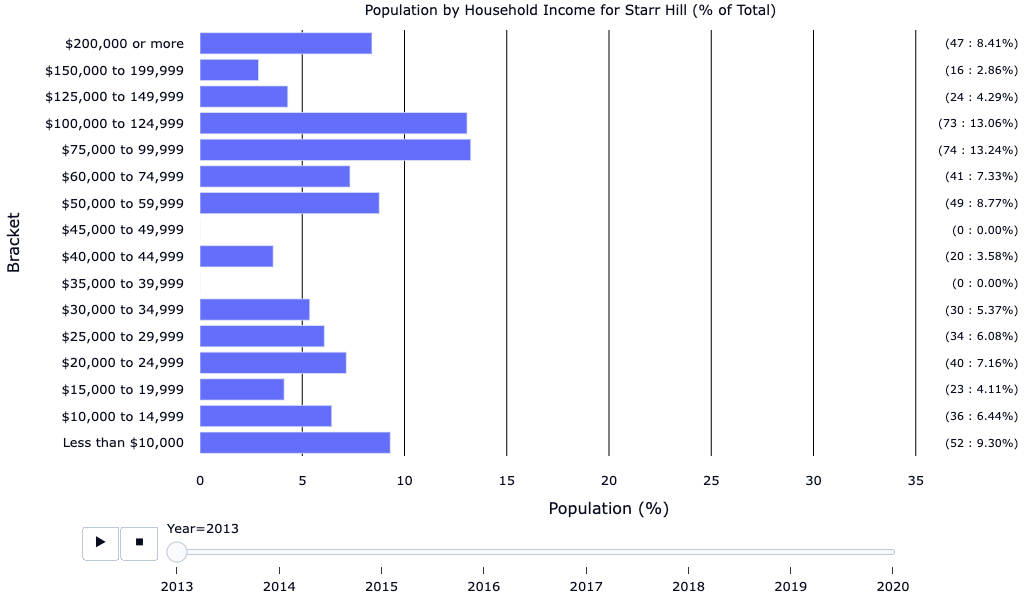

In [27]:
plotIncomeNeighborhood('Starr Hill')